<a href="https://colab.research.google.com/github/Udayan701/Password_Generator/blob/main/K_fold_cross_validation_%26_Tuning_hyperparameters_via_grid_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)

In [ ]:
from sklearn.preprocessing import LabelEncoder
X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

In [ ]:
le.transform(['M', 'B'])

array([1, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,stratify=y,random_state=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
pipe_lr = make_pipeline(StandardScaler(), PCA(n_components=2), KNeighborsClassifier(n_neighbors=5))
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.956


In [ ]:
#K-fold cross-validation
import numpy as np
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=15).split(X_train, y_train)
scores = []
for k, (train, test) in enumerate(kfold):
  pipe_lr.fit(X_train[train], y_train[train])
  score = pipe_lr.score(X_train[test], y_train[test])
  scores.append(score)
  print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,np.bincount(y_train[train]), score))

Fold:  1, Class dist.: [266 158], Acc: 0.935
Fold:  2, Class dist.: [266 158], Acc: 0.903
Fold:  3, Class dist.: [266 158], Acc: 0.903
Fold:  4, Class dist.: [266 158], Acc: 0.968
Fold:  5, Class dist.: [266 158], Acc: 0.968
Fold:  6, Class dist.: [266 159], Acc: 0.933
Fold:  7, Class dist.: [266 159], Acc: 0.867
Fold:  8, Class dist.: [266 159], Acc: 0.867
Fold:  9, Class dist.: [266 159], Acc: 1.000
Fold: 10, Class dist.: [266 159], Acc: 1.000
Fold: 11, Class dist.: [266 159], Acc: 0.933
Fold: 12, Class dist.: [266 159], Acc: 0.967
Fold: 13, Class dist.: [266 159], Acc: 0.967
Fold: 14, Class dist.: [266 159], Acc: 0.933
Fold: 15, Class dist.: [266 159], Acc: 0.933


In [ ]:
print('\nCV(cross-validation) accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))


CV(cross-validation) accuracy: 0.938 +/- 0.040


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=pipe_lr, X=X_train, y=y_train, cv=15, n_jobs=1)
print('CV(cross-validation) accuracy scores: %s' % scores)

CV(cross-validation) accuracy scores: [0.93548387 0.90322581 0.90322581 0.96774194 0.96774194 0.93333333
 0.86666667 0.86666667 1.         1.         0.93333333 0.96666667
 0.96666667 0.93333333 0.93333333]


In [ ]:
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

CV accuracy: 0.938 +/- 0.040


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [ ]:
pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=True))

In [ ]:
param_range =  [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

In [ ]:
param_grid = [{'svc__C': param_range, 'svc__kernel': ['linear']},  {'svc__C': param_range,  'svc__gamma': param_range,  'svc__kernel': ['rbf']}]

In [ ]:
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=10, refit=True, n_jobs=-1)

In [ ]:
gs = gs.fit(X_train, y_train)

In [ ]:
print(gs.best_score_)

0.9846859903381642


In [ ]:
print(gs.best_params_)

{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


In [ ]:
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print('Test accuracy: %.3f' % clf.score(X_test, y_test))

Test accuracy: 0.974


In [ ]:
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid,  scoring='accuracy', cv=2)
scores = cross_val_score(gs, X_train, y_train, 
scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.974 +/- 0.015


In [ ]:
from sklearn.tree import DecisionTreeClassifier
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=True), param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}], scoring='accuracy', cv=2)

In [ ]:
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5)

In [ ]:
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

CV accuracy: 0.938 +/- 0.016


In [ ]:
from sklearn.metrics import confusion_matrix
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[71  1]
 [ 2 40]]


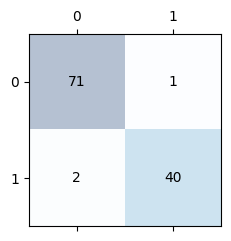

In [ ]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
  for j in range(confmat.shape[1]):
    ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score

In [ ]:
#Ptrecission
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))

Precision: 0.976


In [ ]:
#Recall
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))

Recall: 0.952


In [ ]:
#F1 score
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

F1: 0.964


In [ ]:
#Plotting a receiver operating characteristic
from sklearn.metrics import roc_curve, auc
from scipy import interp
pipe_lr = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression(penalty='l2', random_state=True, solver='lbfgs', C=100.0))


In [ ]:
X_train2 = X_train[:, [4, 14]]


In [ ]:
cv = list(StratifiedKFold(n_splits=3, random_state=True).split(X_train, y_train))

ValueError: ignored